***Loading the dataset***

In [1]:
import pandas as pd
data=pd.read_csv("IMDB Dataset.csv")

In [2]:
print(data.shape)

(50000, 2)


In [3]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


***Transforming documents into feature vectors***


In [5]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()  # initialize CountVectorizer
docs=np.array(['The sun is shining',
               'The weather is sweet',
               'The sun is shining, the weather is sweet, and one and one is two'])

In [6]:
bag=count.fit_transform(docs)  

In [7]:
print(count.vocabulary_)     #count of all words

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [8]:
print(bag.toarray())        #converts feature vector into an array-bag of words model 

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


***Word relevancy using term frequency-inverse document frequency***

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
np.set_printoptions(precision=2)

In [10]:
tfidf=TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())  

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [11]:
data.loc[0,'review'][50:200]            ##1st review, last 50th to 200th character

"r watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo"

***Removing HTML tags or emojis***

In [12]:
import re
def preprocessor(text):
    text= re.sub('<[^>]*>','',text)   # replace <[^>]*> with space 
    emoticons=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)   #moving emoticons towards the end
    text=re.sub('[\W]+',' ',text.lower()) +\
    ''.join(emoticons).replace('-','')
    return text
    

In [13]:
preprocessor(data.loc[0,'review'][50:200])

'r watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me abo'

In [14]:
preprocessor("</a> Test to put :) all emojis :) at the :-) end!")

' test to put all emojis at the end :):):)'

In [15]:
data['review']=data['review'].apply(preprocessor) 

***Tokenizing the documents***

In [16]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()               #intializing PorterStemmer

In [17]:
def tokenizer():
    return text.split()         #splits sentences at space(tokenizing)

In [18]:
def tokenizer_porter(text):               
    return [ps.stem(word) for word in text.split()]   #performing stemming of tokenized data 

***Removing stopwords*** 

In [19]:
import nltk
nltk.download('stopwords')   #downloads 'stopwords' package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop=stopwords.words('english')      #passing stowords as english
[w for w in tokenizer_porter('i like eating and cooking, but mostly I like to eat')[-20:]if w not in stop]  
#if w not in stop
#removes 'and'.'to'

['like', 'eat', 'cooking,', 'mostli', 'I', 'like', 'eat']

***Transforming text into TF-IDF vectors***

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [22]:
tfidf=TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None,
                       tokenizer=tokenizer_porter,
                       use_idf='l2',
                       smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)  # fit_transform()-standardizes the 'review' column of the datafile
print(x)
print(y)

  (0, 58850)	0.04427713506779778
  (0, 16709)	0.0725894675937912
  (0, 73129)	0.03073113953619165
  (0, 66108)	0.04583255595364596
  (0, 11147)	0.021891633045792995
  (0, 31702)	0.020520342600754415
  (0, 69900)	0.04009947474000785
  (0, 67792)	0.06858541878485347
  (0, 14252)	0.06303618848750632
  (0, 7116)	0.03682366946200305
  (0, 40985)	0.03618637593379831
  (0, 22279)	0.043715083083696836
  (0, 59340)	0.055355690554906224
  (0, 62114)	0.05056308116917961
  (0, 36715)	0.041957002081430064
  (0, 64794)	0.02546774704585119
  (0, 8192)	0.07523233312829791
  (0, 32887)	0.02648732785526257
  (0, 67103)	0.034223485143968245
  (0, 13534)	0.049469258066501286
  (0, 42244)	0.04865764606330153
  (0, 40249)	0.05487516704512207
  (0, 71124)	0.024499572075600478
  (0, 26249)	0.04532467310019222
  (0, 47143)	0.04675114896487221
  :	:
  (49999, 65671)	0.07774836734808718
  (49999, 45670)	0.051842402088232334
  (49999, 24367)	0.0326890956924056
  (49999, 1714)	0.07567644947395086
  (49999, 45967)	

***Classifying documents using Logistic Regression*** 

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=1, test_size=0.5,shuffle=False)

In [24]:
import pickle
from sklearn.linear_model import LogisticRegressionCV

clf= LogisticRegressionCV(cv=5,
                         scoring='accuracy',
                         random_state=0,
                         n_jobs=-1,
                         verbose=3,
                         max_iter=300).fit(x_train,y_train)
saved_model=open('saved_model.sav', 'wb')
pickle.dump(clf,saved_model)
saved_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


***Evaluating the model***

In [25]:
filename='saved_model.sav'
saved_clf=pickle.load(open(filename,'rb'))

In [32]:
saved_clf.score(x_test,y_test)

0.89444

***Recall and Precision Values***

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report
names=['Positive', 'Negative']
y_pred = clf.predict(x_test)
y_score = clf.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred, target_names=names))

              precision    recall  f1-score   support

    Positive       0.90      0.89      0.89     12474
    Negative       0.89      0.90      0.90     12526

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

['negative' 'negative' 'positive' ... 'positive' 'negative' 'negative']


***Plotting ROC and AUC***

In [39]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score,pos_label='positive')
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

roc_auc_score for Logistic Regression:  0.9605781910454857


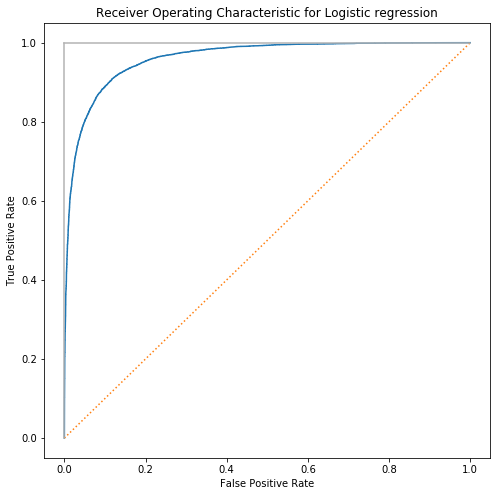

In [44]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic for Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls=":")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
